In [1]:
import os
import numpy as np
from six.moves import cPickle
import matplotlib.pyplot as plt
%matplotlib inline


# Plot filter match

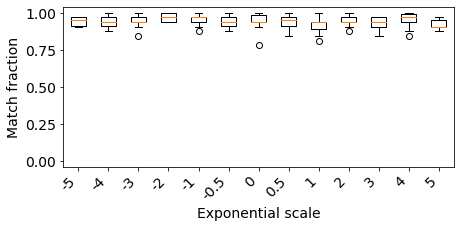

In [5]:
scales = [-5, -4, -3, -2, -1, -0.5, 0,  0.5, 1, 2, 3, 4, 5]
results_path = os.path.join('../results', 'exp_pos_sweep')
file_path = os.path.join(results_path, 'pos_sweep_filter_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
    
fig = plt.figure(figsize=(7,10))
ax = plt.subplot(3,1,1)
vals = []
for thresh in scales:
    vals.append(results[thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.ylim([-.04, 1.04])
plt.xticks(range(1,len(scales)+1), scales, fontsize=14, rotation=45, ha="right");
plt.xlabel('Exponential scale', fontsize=14)
outfile = os.path.join(results_path, 'filter_thresh.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



#### No batchnorm

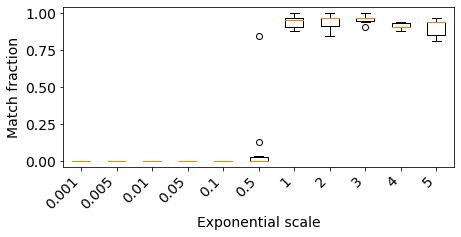

In [3]:
scales = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5]

results_path = os.path.join('../results', 'exp_scale_sweep_nobn_real')
file_path = os.path.join(results_path, 'intialization_sweep_filter_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
    
fig = plt.figure(figsize=(7,10))
ax = plt.subplot(3,1,1)
vals = []
for thresh in scales:
    vals.append(results[thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.ylim([-.04, 1.04])
plt.xticks(range(1,len(scales)+1), scales, fontsize=14, rotation=45, ha="right");
plt.xlabel('Exponential scale', fontsize=14)
outfile = os.path.join(results_path, 'filter_thresh.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')



(0.0, 10.0)

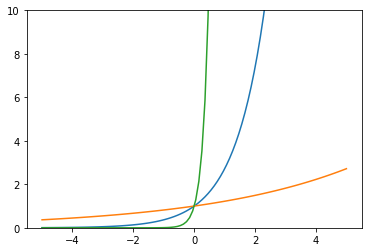

In [4]:
x = np.linspace(-5,5,100)
plt.plot(x, np.exp(x))
plt.plot(x, np.exp(x*.2))
plt.plot(x, np.exp(x*5))
plt.ylim([0,10])

# check activation distribution for with bn and without bn

In [5]:

from tensorflow import keras
import helper

# load data
data_path = '../data/synthetic_dataset.h5'
data = helper.load_data(data_path)
x_train, y_train, x_valid, y_valid, x_test, y_test = data


In [6]:
keras.backend.clear_session()

model_name = 'cnn-deep'
activation = 'exponential'

# load model
model = helper.load_model(model_name, 
                          activation=activation, 
                          input_shape=200)

# set up optimizer and metrics
auroc = keras.metrics.AUC(curve='ROC', name='auroc')
aupr = keras.metrics.AUC(curve='PR', name='aupr')
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.BinaryCrossentropy(from_logits=False, label_smoothing=0)
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=['accuracy', auroc, aupr])

In [13]:
weights_path = '../results/exp_scale_sweep_real/model_params/cnn-deep_5_0.hdf5'
model.load_weights(weights_path)

In [14]:
intermediate = keras.Model(inputs=model.inputs, outputs=model.layers[2].output)
pre_fmap = intermediate.predict(x_test)

intermediate = keras.Model(inputs=model.inputs, outputs=model.layers[3].output)
post_fmap = intermediate.predict(x_test)

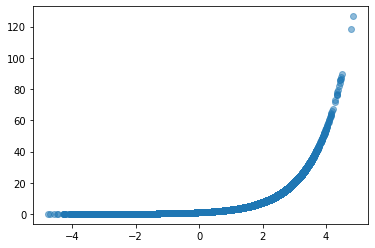

In [15]:
plt.scatter(pre_fmap[:200], post_fmap[:200], alpha=0.5);

In [16]:
weights_path = '../results/exp_scale_sweep_real/model_params/cnn-deep_1_0.hdf5'
model.load_weights(weights_path)

In [17]:
intermediate = keras.Model(inputs=model.inputs, outputs=model.layers[2].output)
pre_fmap2 = intermediate.predict(x_test)

intermediate = keras.Model(inputs=model.inputs, outputs=model.layers[3].output)
post_fmap2 = intermediate.predict(x_test)

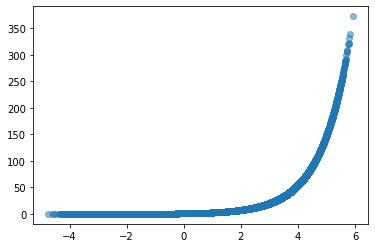

In [18]:
plt.scatter(pre_fmap2[:200], post_fmap2[:200], alpha=0.5);

In [24]:
np.max(post_fmap)

224.86798

In [25]:
np.max(post_fmap2)

396.13165

(-4.0, 6.0)

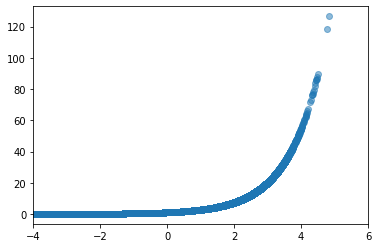

In [21]:
plt.scatter(pre_fmap[:200], post_fmap[:200], alpha=0.5);
plt.xlim([-4,6])
#plt.scatter(pre_fmap2[:200], post_fmap2[:200], alpha=0.5);

(-4.0, 6.0)

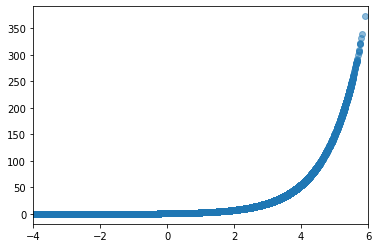

In [22]:
plt.scatter(pre_fmap2[:200], post_fmap2[:200], alpha=0.5);
plt.xlim([-4,6])

# Plot history 


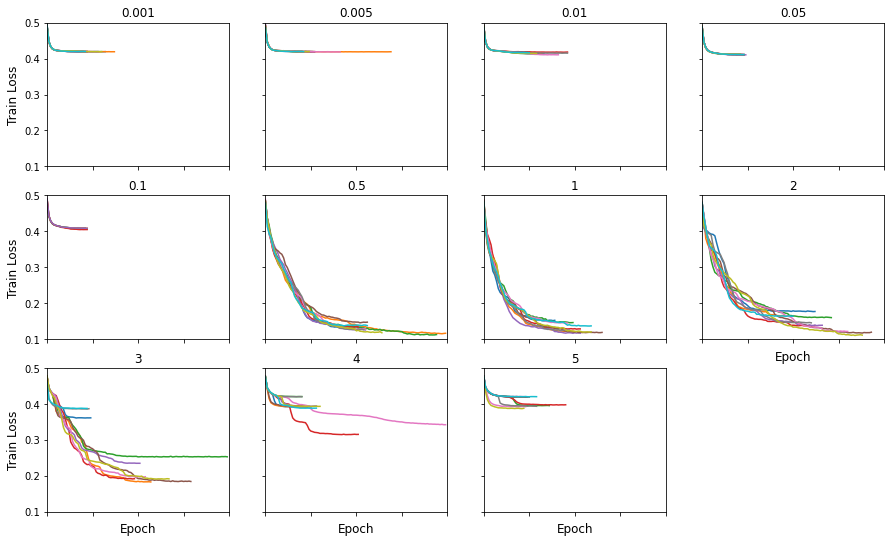

In [29]:
scales = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5]
model_name = 'cnn-deep'
ylim = [0.1, 0.5]


fig = plt.figure(figsize=(15,9))

index = 0
file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
ax = plt.subplot(3,4,index+1)
for trial in range(10):
    ax.plot(np.array(results[trial])[0,:])    
plt.title(scales[index], fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.xlim([0,100])
plt.ylim(ylim)
ax.set_xticklabels([])
plt.ylabel('Train Loss', fontsize=12)

for index in range(1,4):
    file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
    ax = plt.subplot(3,4,index+1)
    for trial in range(10):
        ax.plot(np.array(results[trial])[0,:])    
    plt.title(scales[index], fontsize=12)
    plt.xticks([0, 25, 50, 75, 100], fontsize=12)
    plt.xlim([0,100])
    plt.ylim(ylim)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

index = 4
file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
ax = plt.subplot(3,4,index+1)
for trial in range(5):
    ax.plot(np.array(results[trial])[0,:])    
plt.title(scales[index], fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.xlim([0,100])
plt.ylim(ylim)
ax.set_xticklabels([])
plt.ylabel('Train Loss', fontsize=12)

for index in range(5,8):
    file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
    ax = plt.subplot(3,4,index+1)
    for trial in range(10):
        ax.plot(np.array(results[trial])[0,:])    
    plt.title(scales[index], fontsize=12)
    plt.xticks([0, 25, 50, 75, 100], fontsize=12)
    plt.xlim([0,100])
    plt.ylim(ylim)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
plt.xlabel('Epoch', fontsize=12)
    
index = 8
file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
ax = plt.subplot(3,4,index+1)
for trial in range(10):
    ax.plot(np.array(results[trial])[0,:])    
plt.title(scales[index], fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.xlim([0,100])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Train Loss', fontsize=12)

plt.ylim(ylim)
ax.set_xticklabels([])

for index in range(9,11):
    file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
    ax = plt.subplot(3,4,index+1)
    for trial in range(10):
        ax.plot(np.array(results[trial])[0,:])    
    plt.title(scales[index], fontsize=12)
    plt.xlim([0,100])
    plt.ylim(ylim)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.xticks([0, 25, 50, 75, 100], fontsize=12)
    plt.xlabel('Epoch', fontsize=12)

outfile = os.path.join(results_path, 'training_loss.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


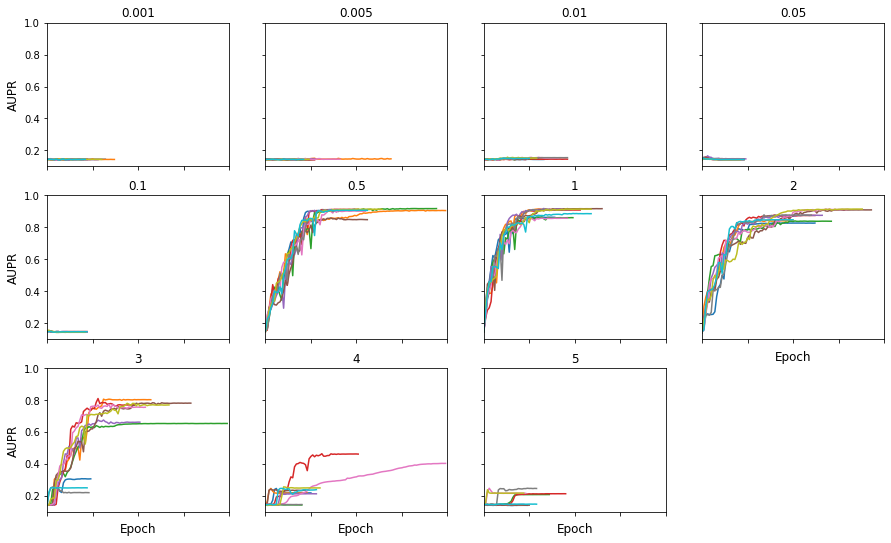

In [30]:
scales = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5]
model_name = 'cnn-deep'
ylim = [0.1, 1.0]


fig = plt.figure(figsize=(15,9))

index = 0
file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
ax = plt.subplot(3,4,index+1)
for trial in range(10):
    ax.plot(np.array(results[trial])[5,:])    
plt.title(scales[index], fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.xlim([0,100])
plt.ylim(ylim)
ax.set_xticklabels([])
plt.ylabel('AUPR', fontsize=12)

for index in range(1,4):
    file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
    ax = plt.subplot(3,4,index+1)
    for trial in range(10):
        ax.plot(np.array(results[trial])[5,:])    
    plt.title(scales[index], fontsize=12)
    plt.xticks([0, 25, 50, 75, 100], fontsize=12)
    plt.xlim([0,100])
    plt.ylim(ylim)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

index = 4
file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
ax = plt.subplot(3,4,index+1)
for trial in range(10):
    ax.plot(np.array(results[trial])[5,:])    
plt.title(scales[index], fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.xlim([0,100])
plt.ylim(ylim)
ax.set_xticklabels([])
plt.ylabel('AUPR', fontsize=12)

for index in range(5,8):
    file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
    ax = plt.subplot(3,4,index+1)
    for trial in range(10):
        ax.plot(np.array(results[trial])[5,:])    
    plt.title(scales[index], fontsize=12)
    plt.xticks([0, 25, 50, 75, 100], fontsize=12)
    plt.xlim([0,100])
    plt.ylim(ylim)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    
plt.xlabel('Epoch', fontsize=12)
    
index = 8
file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
ax = plt.subplot(3,4,index+1)
for trial in range(10):
    ax.plot(np.array(results[trial])[5,:])    
plt.title(scales[index], fontsize=12)
plt.xticks([0, 25, 50, 75, 100], fontsize=12)
plt.xlim([0,100])
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('AUPR', fontsize=12)

plt.ylim(ylim)
ax.set_xticklabels([])

for index in range(9,11):
    file_path = os.path.join(results_path, model_name+'_'+str(scales[index])+"_history.pickle")
    with open(file_path, 'rb') as f:
        results = cPickle.load(f)
    ax = plt.subplot(3,4,index+1)
    for trial in range(10):
        ax.plot(np.array(results[trial])[5,:])    
    plt.title(scales[index], fontsize=12)
    plt.xlim([0,100])
    plt.ylim(ylim)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.xticks([0, 25, 50, 75, 100], fontsize=12)
    plt.xlabel('Epoch', fontsize=12)

outfile = os.path.join(results_path, 'AUPR.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')


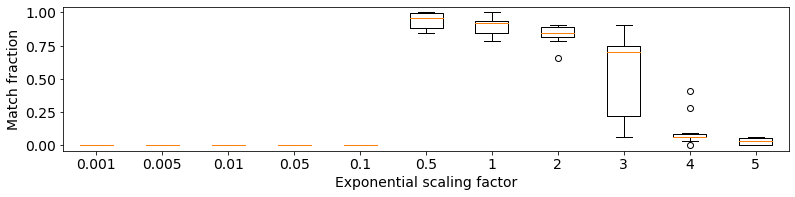

In [34]:

scales = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5]
activation = 'exponential'

results_path = os.path.join('../results', 'exp_scale_sweep_real')
file_path = os.path.join(results_path, 'intialization_sweep_filter_results.pickle')
with open(file_path, 'rb') as f:
    results = cPickle.load(f)
    
    
fig = plt.figure(figsize=(13,9))
ax = plt.subplot(3,1,1)
vals = []
for thresh in scales:
    vals.append(results[thresh]['match_fraction'])
ax.boxplot(vals);
ax.set_xticklabels([])
plt.ylabel('Match fraction', fontsize=14)
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], fontsize=14)
plt.ylim([-0.04,1.04])

plt.xticks(range(1,len(scales)+1), scales, fontsize=14);
plt.xlabel('Exponential scaling factor', fontsize=14)
        
outfile = os.path.join(results_path, 'filter_thresh.pdf')
fig.savefig(outfile, format='pdf', dpi=200, bbox_inches='tight')

